In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from scipy.stats import ttest_ind, t
import matplotlib.colors as mcolors

Prepare data

In [14]:
df = pd.read_csv('data/DatasetEV2.csv')
df = df[df["90%CCM, 91%IB, 97.5%IA_cyano"] == 1]

df["Form"] = df["Form"].replace("IAc_cyano", "α-cyano")
df["Form"] = df["Form"].replace("IB", "β-cyano")
df["Form"] = df["Form"].replace("IAc_noncyano", "CCM-proteo")

df['Rate mean [s-1]'] = df['Rate mean [s-1]'].astype(float)

df.loc[:,"Form"] = pd.Categorical(df["Form"],
                                   categories=['α-cyano','β-cyano', 'CCM-proteo'],
                                   ordered=True)

my_pal = {"α-cyano":'#76e5d0ff', "β-cyano": '#55b9b1ff', "CCM-proteo":'#aacc68ff'}



# Filter "thermophile/hot envir" 
df2 = pd.read_csv('data/DatasetEV3.csv')
df = df[df["90%CCM, 91%IB, 97.5%IA_cyano"] == 1]
df2_vent = df2[df2['environmental_context'] == "hydrothermal vent"]
df2_spring = df2[df2['environmental_context'] == "hot spring"]
df2_thermophile = df2[df2['T°_opt'] >= 45]

df2_thermophile_hot_envir = pd.concat([df2_vent, df2_spring, df2_thermophile])
df2_thermophile_hot_envir = df2_thermophile_hot_envir.drop_duplicates()

df2_filtered = df2[~df2.index.isin(df2_thermophile_hot_envir.index)]

# filter df based on the filter applied to df2
df_thermophile_hot_envir = df[df['Internal ID'].isin(df2_thermophile_hot_envir['Internal ID'])]
df_filtered = df[df['Internal ID'].isin(df2_filtered['Internal ID'])]

Statistical tests

In [16]:
pop1 = df[df['Form'] == 'α-cyano']['Rate mean [s-1]'].dropna()
pop2 = df[df['Form'] == 'β-cyano']['Rate mean [s-1]'].dropna()
pop3 = df[df['Form'] == 'CCM-proteo']['Rate mean [s-1]'].dropna()

# Kruskal-Wallis test on the three populations
statistic, pvalue = kruskal(pop1, pop2, pop3)

if pvalue < 0.05:
    print(f'+ thermophilic/hot environment\nKruskal-Wallis test: At least two populations are significantly different. p = {pvalue}')
else:
    print('+ thermophilic/hot environment\nKruskal-Wallis test: All populations are not significantly different')
    

# t-values for each pair of populations
t1, p1 = ttest_ind(pop1, pop2)
t2, p2 = ttest_ind(pop1, pop3)
t3, p3 = ttest_ind(pop2, pop3)

# Calculate critical t-value
alpha = 0.05  # desired level of significance
degfree = len(pop1) + len(pop2) - 2  # degrees of freedom
critical_t = t.ppf(1 - alpha / 2, degfree)  # two-tailed test

# Compare calculated t-values to critical t-value
if abs(t1) > critical_t:
    print(f"Populations 1 and 2 are significantly different. p = {p1}")
if abs(t2) > critical_t:
    print(f"Populations 1 and 3 are significantly different. p = {p2}")
if abs(t3) > critical_t:
    print(f"Populations 2 and 3 are significantly different. p = {p3}")



pop1_filtered = df_filtered[df_filtered['Form'] == 'α-cyano']['Rate mean [s-1]'].dropna()
pop2_filtered = df_filtered[df_filtered['Form'] == 'β-cyano']['Rate mean [s-1]'].dropna()
pop3_filtered = df_filtered[df_filtered['Form'] == 'CCM-proteo']['Rate mean [s-1]'].dropna()

# Kruskal-Wallis test on the three populations
statistic_filtered, pvalue_filtered = kruskal(pop1_filtered, pop2_filtered, pop3_filtered)

if pvalue_filtered < 0.05:
    print(f'\n- thermophilic/hot environment\nKruskal-Wallis test: At least two populations are significantly different. p = {pvalue_filtered}')
else:
    print('\n- thermophilic/hot environment\nKruskal-Wallis test: All populations are not significantly different')


# t-values for each pair of populations
t1_filtered, p1_filtered = ttest_ind(pop1_filtered, pop2_filtered)
t2_filtered, p2_filtered = ttest_ind(pop1_filtered, pop3_filtered)
t3_filtered, p3_filtered = ttest_ind(pop2_filtered, pop3_filtered)

# Calculate critical t-value
alpha = 0.05  # desired level of significance
degfree_filtered = len(pop1_filtered) + len(pop2_filtered) - 2  # degrees of freedom
critical_t_filtered = t.ppf(1 - alpha / 2, degfree_filtered)  # two-tailed test

# Compare calculated t-values to critical t-value
if abs(t1_filtered) > critical_t_filtered:
    print(f"Populations 1 and 2 are significantly different. p = {p1_filtered}")
if abs(t2_filtered) > critical_t_filtered:
    print(f"Populations 1 and 3 are significantly different. p = {p2_filtered}")
if abs(t3_filtered) > critical_t_filtered:
    print(f"Populations 2 and 3 are significantly different. p = {p3_filtered}")

+ thermophilic/hot environment
Kruskal-Wallis test: At least two populations are significantly different. p = 0.0005878773148365399
Populations 1 and 2 are significantly different. p = 0.00014390692738358162
Populations 1 and 3 are significantly different. p = 0.0001820664095941791

- thermophilic/hot environment
Kruskal-Wallis test: At least two populations are significantly different. p = 0.0018121014392760155
Populations 1 and 2 are significantly different. p = 0.0006972949245589886
Populations 1 and 3 are significantly different. p = 0.0006084123533799779


Plot

/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

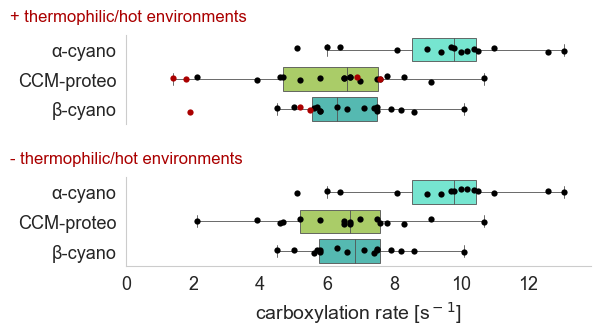

In [21]:
plt.rc('font', size=13)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 3), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.6})

# boxplot/swarmplot on first axis for the main group
sns.boxplot(data=df, x='Rate mean [s-1]', y='Form', palette=my_pal, saturation=1, ax=axs[0], showfliers=False, linewidth=0.6)
sns.stripplot(data=df_filtered, x='Rate mean [s-1]', y='Form', color='black', ax=axs[0], jitter=True, size=4.5)
sns.stripplot(data=df_thermophile_hot_envir, x='Rate mean [s-1]', y='Form', color='#aa0000ff', ax=axs[0], jitter=True, size=4.5)


axs[0].set_ylabel('')
axs[0].spines.top.set_visible(False)
axs[0].spines.right.set_visible(False)
axs[0].spines.bottom.set_visible(False)
axs[0].set_xlabel('')
axs[0].set(xticklabels=[])
axs[0].tick_params(bottom=False)
axs[0].set_xlim(0, 13.9)
axs[0].grid(False)

# Create a second boxplot/swarmplot on the second axis without the "thermophile/hot envir" group
sns.boxplot(data=df_filtered, x='Rate mean [s-1]', y='Form', palette=my_pal, saturation=1, ax=axs[1], showfliers=False, linewidth=0.6)
sns.stripplot(data=df_filtered, x='Rate mean [s-1]', y='Form', color='black', ax=axs[1], jitter=True, size=4.5)

axs[1].set_ylabel('')
axs[1].spines.top.set_visible(False)
axs[1].spines.right.set_visible(False)
axs[1].set_xlabel('carboxylation rate [s$^-$$^1$]', fontsize=14)
axs[1].set_xlim(0, 13.9)
axs[1].grid(False)

axs[0].text(-0.25, 1.15, '+ thermophilic/hot environments', transform=axs[0].transAxes, fontsize=12, color="#aa0000ff")
axs[1].text(-0.25, 1.15, '- thermophilic/hot environments', transform=axs[1].transAxes, fontsize=12, color="#aa0000ff")

fig.patch.set_facecolor('none')
plt.savefig(r'plots/acyano_bcyano_CCMproteo_homog_no_thermophile_hot_envir.svg', dpi=300, bbox_inches='tight')
plt.show()

Summary table

In [19]:
df.loc[:, "Form"] = pd.Categorical(df["Form"],
                                   categories=['α-cyano', 'β-cyano', 'CCM-proteo'],
                                   ordered=True)

df['tested'] = ""

df_count_tested = df.groupby("Form")["tested"].count().reset_index()

df_count_active = df.groupby("Form")["Rate mean [s-1]"].count().reset_index()
df_count_active.rename(columns={'Rate mean [s-1]': 'active'}, inplace=True)

df_count_medianrate = df.groupby("Form")["Rate mean [s-1]"].median().reset_index()
df_count_medianrate.rename(columns={'Rate mean [s-1]': 'median rate'}, inplace=True)

df_count_stdev = df.groupby("Form")["Rate mean [s-1]"].std().reset_index()
df_count_stdev.rename(columns={'Rate mean [s-1]': 'standard deviation'}, inplace=True)

df_count_iqr1 = df.groupby("Form")["Rate mean [s-1]"].quantile(0.25).reset_index()
df_count_iqr1.rename(columns={'Rate mean [s-1]': 'IQR1'}, inplace=True)

df_count_iqr3 = df.groupby("Form")["Rate mean [s-1]"].quantile(0.75).reset_index()
df_count_iqr3.rename(columns={'Rate mean [s-1]': 'IQR3'}, inplace=True)

df_count = pd.merge(df_count_tested, df_count_active, on=['Form'])
df_count = pd.merge(df_count, df_count_medianrate, on=['Form'])
df_count = pd.merge(df_count, df_count_stdev, on=['Form'])
df_count = pd.merge(df_count, df_count_iqr1, on=['Form'])
df_count = pd.merge(df_count, df_count_iqr3, on=['Form'])

df_count['%clustering'] = ["97.5%", "91%", "90%"]

print('+ thermophilic/hot environment')
print(df_count)


df_filtered.loc[:, "Form"] = pd.Categorical(df_filtered["Form"],
                                   categories=['α-cyano', 'β-cyano', 'CCM-proteo'],
                                   ordered=True)

df_filtered['tested'] = ""

df_count_tested = df_filtered.groupby("Form")["tested"].count().reset_index()

df_count_active = df_filtered.groupby("Form")["Rate mean [s-1]"].count().reset_index()
df_count_active.rename(columns={'Rate mean [s-1]': 'active'}, inplace=True)

df_count_medianrate = df_filtered.groupby("Form")["Rate mean [s-1]"].median().reset_index()
df_count_medianrate.rename(columns={'Rate mean [s-1]': 'median rate'}, inplace=True)

df_count_stdev = df_filtered.groupby("Form")["Rate mean [s-1]"].std().reset_index()
df_count_stdev.rename(columns={'Rate mean [s-1]': 'standard deviation'}, inplace=True)

df_count_iqr1 = df_filtered.groupby("Form")["Rate mean [s-1]"].quantile(0.25).reset_index()
df_count_iqr1.rename(columns={'Rate mean [s-1]': 'IQR1'}, inplace=True)

df_count_iqr3 = df_filtered.groupby("Form")["Rate mean [s-1]"].quantile(0.75).reset_index()
df_count_iqr3.rename(columns={'Rate mean [s-1]': 'IQR3'}, inplace=True)

df_count = pd.merge(df_count_tested, df_count_active, on=['Form'])
df_count = pd.merge(df_count, df_count_medianrate, on=['Form'])
df_count = pd.merge(df_count, df_count_stdev, on=['Form'])
df_count = pd.merge(df_count, df_count_iqr1, on=['Form'])
df_count = pd.merge(df_count, df_count_iqr3, on=['Form'])

df_count['%clustering'] = ["97.5%", "91%", "90%"]

print('\n- thermophilic/hot environment')
print(df_count)


+ thermophilic/hot environment
         Form  tested  active  median rate  standard deviation   IQR1    IQR3  \
0  CCM-proteo      23      20          6.6            2.417567  4.675   7.525   
1     α-cyano      19      15          9.8            2.249508  8.550  10.450   
2     β-cyano      29      19          6.3            1.793213  5.550   7.500   

  %clustering  
0       97.5%  
1         91%  
2         90%  

- thermophilic/hot environment
         Form  tested  active  median rate  standard deviation   IQR1   IQR3  \
0  CCM-proteo      17      17         6.70            2.046608  5.200   7.60   
1     α-cyano      15      15         9.80            2.249508  8.550  10.45   
2     β-cyano      16      16         6.85            1.464240  5.775   7.60   

  %clustering  
0       97.5%  
1         91%  
2         90%  


/var/folders/xd/tzd66fkj5s5676432q_qccqr0000gn/T/ipykernel_77483/4185280531.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tested'] = ""
